In [8]:
import pandas as pd
import geopandas as gpd
import cbsodata
import mapclassify as mc


# Find out which columns are available
# 37201	    , LevendGeborenKinderenRelatief_2
# 3747	    , MannenEnVrouwen_4
# 37201 	, JongerDan20Jaar_9
# 37201	    , k_40Tot45Jaar_14 & k_45JaarOfOuder_15
# 71487NED	, TotaalHuishoudensMetKinderen_1
# 85701NED	, A025294 & A025297
# 85701NED	, A025294
# 37259NED	, BevolkingOp1Januari_1
# 37259NED	, Bevolkingsdichtheid_2
# 85826NED	, WerkzameBeroepsbevolking_3
# 85826NED	, Beroepsbevolking_2
# 85826NED	, WerklozeBeroepsbevolking_12
metadata = pd.DataFrame(cbsodata.get_meta('37201', 'TypedDataSet'))


In [3]:
metadata = metadata[['RegioS','Perioden','LevendGeborenKinderenRelatief_2']]

In [4]:
metadata

,RegioS,Perioden,LevendGeborenKinderenRelatief_2
0,NL01,1988JJ00,12.6
1,NL01,1989JJ00,12.7
2,NL01,1990JJ00,13.2
3,NL01,1991JJ00,13.2
4,NL01,1992JJ00,13.0
...,...,...,...
31180,GM0997,2018JJ00,NaN
31181,GM0997,2019JJ00,NaN
31182,GM0997,2020JJ00,NaN
31183,GM0997,2021JJ00,NaN


In [5]:
data = metadata[metadata['Perioden'] == '2020JJ00']

In [6]:
data

,RegioS,Perioden,LevendGeborenKinderenRelatief_2
32,NL01,2020JJ00,9.7
67,LD01,2020JJ00,8.6
102,LD02,2020JJ00,9.7
137,LD03,2020JJ00,10.3
172,LD04,2020JJ00,8.7
...,...,...,...
31042,GM0192,2020JJ00,NaN
31077,GM0138,2020JJ00,NaN
31112,GM0642,2020JJ00,9.1
31147,GM0193,2020JJ00,11.4


Text(0.5, 1.0, 'Quantiles, 2020')

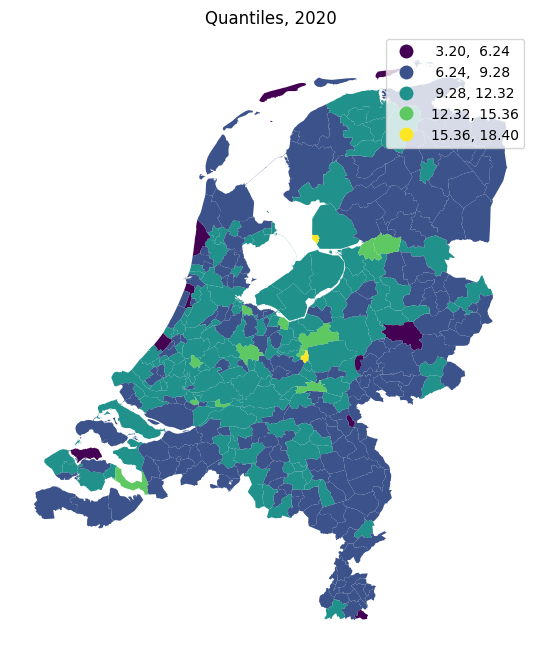

In [13]:
municipal_boundaries = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "RegioS")
# Create a thematic map
# schemes:
# Natural_Breaks, Equal_Interval, Quantiles, Standard_Deviation
#
# boxplot, equalinterval, fisherjenks, fisherjenkssampled, headtailbreaks, jenkscaspall, 
# jenkscaspallforced, jenkscaspallsampled, maxp, maximumbreaks, naturalbreaks, quantiles, 
# percentiles, prettybreaks, stdmean, userdefined
#
# K = number of classes (if no scheme, default on 5)
p = municipal_boundaries.plot(column='LevendGeborenKinderenRelatief_2',
                             scheme="Equal_Interval",
                             k=5,
                             legend = True, 
                             figsize = (10,8))
p.axis('off')
p.set_title('Quantiles, 2020')


In [11]:
mc.FisherJenks?

Init signature: mc.FisherJenks(y, k=5)
Docstring:     
Fisher Jenks optimal classifier - mean based.

Parameters
----------

y : numpy.array
    :math:`(n,1)`, values to classify.
k : int (default 5)
    The number of classes required.

Attributes
----------

yb : numpy.array
    :math:`(n,1)`, bin IDs for observations.
bins : numpy.array
    :math:`(k,1)`, the upper bounds of each class.
k : int
    The number of classes.
counts : numpy.array
    :math:`(k,1)`, the number of observations falling in each class.

Examples
--------

>>> import mapclassify
>>> cal = mapclassify.load_example()
>>> fj = mapclassify.FisherJenks(cal)
>>> fj.adcm
799.24

>>> list(fj.bins)
[75.29, 192.05, 370.5, 722.85, 4111.45]

>>> list(fj.counts)
[49, 3, 4, 1, 1]
File:           c:\users\juliu\vscode\vscode\inkar-indicators\.venv\lib\site-packages\mapclassify\classifiers.py
Type:           type
Subclasses:     